In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model

### 데이터 생성

In [6]:
data = {'x' : [13, 19, 16, 14, 15, 14],
       'y' : [40, 83, 62, 48, 58, 43]}

In [8]:
print(type(data))

<class 'dict'>


In [10]:
df = pd.DataFrame(data)
df

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [11]:
len(df)

6

In [12]:
df.shape

(6, 2)

In [13]:
df_arr = np.array(df)
df_arr

array([[13, 40],
       [19, 83],
       [16, 62],
       [14, 48],
       [15, 58],
       [14, 43]], dtype=int64)

In [14]:
type(df_arr)

numpy.ndarray

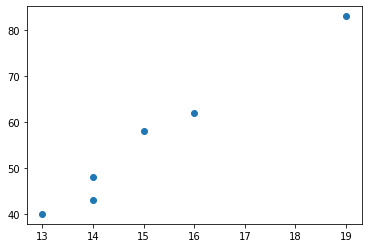

In [15]:
plt.scatter(df.x, df.y)

In [17]:
linear_regression = linear_model.LinearRegression() # 선형회귀모델 생성

In [20]:
linear_regression.fit(X = pd.DataFrame(df['x']), y=df['y']) # 모델 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# 생성된 모델을 통한 예측값 출력
prediction = linear_regression.predict(X=pd.DataFrame(df['x']))

In [22]:
prediction

array([39.78832117, 83.75912409, 61.77372263, 47.11678832, 54.44525547,
       47.11678832])

In [23]:
linear_regression.intercept_

-55.48175182481753

In [24]:
linear_regression.coef_ # y = -55.4818 + 7.3285 * X

array([7.32846715])

## 적합도 검증 : 잔차검증

In [27]:
residuals = df['y'] - prediction # 잔차 = 실제값 - 예측값

In [28]:
residuals

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64

In [31]:
# 오차제곱합

SSE = (residuals**2).sum()
SSE

31.03649635036502

In [35]:
# 총변동

SST = ((df['y']-df['y'].mean())**2).sum()
SST

1257.3333333333333

In [38]:
# 결정계수

R_square = 1 - (SSE/SST)
R_square

0.9753156179610034

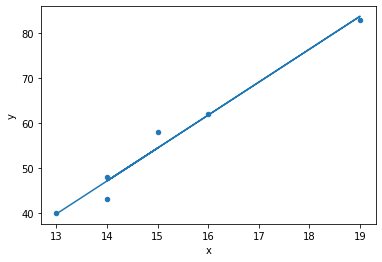

In [39]:
# 시각화

df.plot(kind='scatter', x='x', y='y')
plt.plot(data['x'], prediction)
plt.show()

In [41]:
## 모형 성능평가

MSE = (residuals**2).mean()
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

5.172749391727503
2.2743679103714736


In [45]:
from sklearn.metrics import mean_squared_error
print('R-squared=', linear_regression.score(X=pd.DataFrame(df['x']), y=df['y']))
print('MSE=', mean_squared_error(prediction, data['y']))
print('RMSE=', mean_squared_error(prediction, data['y'])**0.5)

R-squared= 0.9753156179610034
MSE= 5.172749391727503
RMSE= 2.2743679103714736
